# Import Data

In [37]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import math

from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import torch.nn as nn
import torch.optim as optimr

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
zip_path = "E:\Coding\sem5\DL\ProjekAkhirDL\ALLFLOWMETER_HIKARI2021.zip"

with zipfile.ZipFile(zip_path, 'r') as zipped_file:
    csv_file_name = zipped_file.namelist()[0]

    with zipped_file.open(csv_file_name) as csv_file:
        df = pd.read_csv(csv_file)

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\hadik\AppData\Local\Temp\ipykernel_19988\798606535.py:1: SyntaxWarning: invalid escape sequence '\C'
  zip_path = "E:\Coding\sem5\DL\ProjekAkhirDL\ALLFLOWMETER_HIKARI2021.zip"


In [39]:
df.head()

,Unnamed: 0.1,Unnamed: 0,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,0,0,Cg61Jch3vdz9DBptj,103.255.15.23,13316,128.199.242.104,443,2.207588,15,14,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,1
1,1,1,CdRIlqLWdj35Y9vW9,103.255.15.23,13318,128.199.242.104,443,15.624266,15,14,...,1.534300e+07,1.534300e+07,1.534300e+07,1.534300e+07,0.0,29200,65160,0,Bruteforce-XML,1
2,2,2,CLzp9Khd0Y09Qkgrg,103.255.15.23,13320,128.199.242.104,443,12.203357,14,13,...,1.196814e+07,1.196814e+07,1.196814e+07,1.196814e+07,0.0,29200,65160,0,Bruteforce-XML,1
3,3,3,Cnf1YA4iLB4CSNWB88,103.255.15.23,13322,128.199.242.104,443,9.992448,14,13,...,9.759205e+06,9.759205e+06,9.759205e+06,9.759205e+06,0.0,29200,65160,0,Bruteforce-XML,1
4,4,4,C4ZKvv3fpO72EAOsJ6,103.255.15.23,13324,128.199.242.104,443,7.780611,14,14,...,7.545305e+06,7.545305e+06,7.545305e+06,7.545305e+06,0.0,29200,65160,0,Bruteforce-XML,1


# Preprocessing Data

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555278 entries, 0 to 555277
Data columns (total 88 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0.1              555278 non-null  int64  
 1   Unnamed: 0                555278 non-null  int64  
 2   uid                       555278 non-null  object 
 3   originh                   555278 non-null  object 
 4   originp                   555278 non-null  int64  
 5   responh                   555278 non-null  object 
 6   responp                   555278 non-null  int64  
 7   flow_duration             555278 non-null  float64
 8   fwd_pkts_tot              555278 non-null  int64  
 9   bwd_pkts_tot              555278 non-null  int64  
 10  fwd_data_pkts_tot         555278 non-null  int64  
 11  bwd_data_pkts_tot         555278 non-null  int64  
 12  fwd_pkts_per_sec          555278 non-null  float64
 13  bwd_pkts_per_sec          555278 non-null  f

In [22]:
df.shape[0]

555278

In [23]:
df.isnull().sum().any()

False

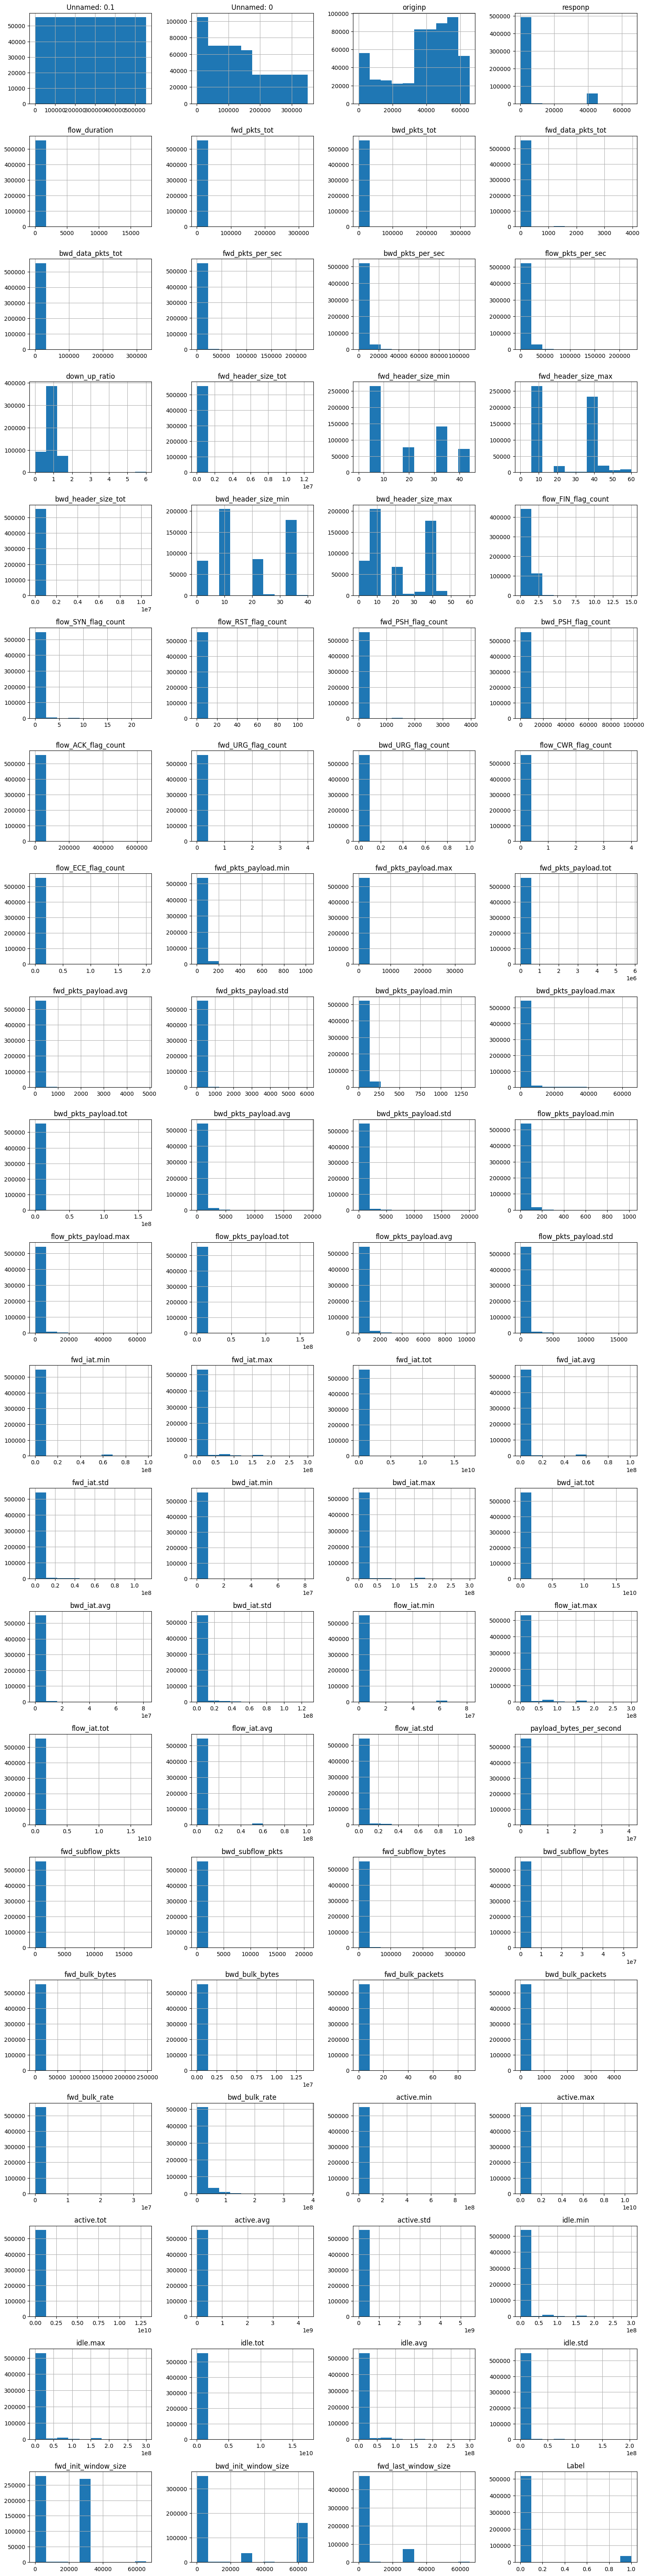

In [5]:
num_features = len(df.columns)
cols = 4
rows = math.ceil(num_features / cols) 

df.hist(figsize=(cols * 4, rows * 3), layout=(rows, cols))
plt.tight_layout()
plt.show()

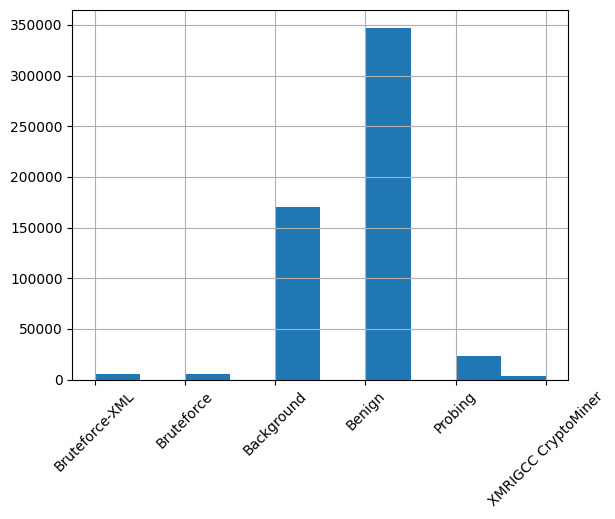

In [42]:
df['traffic_category'].hist()
plt.xticks(rotation=45)
plt.show()

## Label Encoding

In [23]:
encoder = LabelEncoder()

def LabelEncoding(df):
    object_features = df.select_dtypes(include=['object'])
    for col in object_features:
        df[col] = encoder.fit_transform(df[col])
    return df

## Z-Score Standarization

In [24]:
zscore = StandardScaler()

def Standarization(df):
    df_zscore = zscore.fit_transform(df)
    df = pd.DataFrame(df_zscore, columns=df.columns)
    return df

## MinMax Normalization

In [25]:
minmax = MinMaxScaler()

def Normalization(df):
    df_scaled = minmax.fit_transform(df)
    df = pd.DataFrame(df_scaled, columns=df.columns)
    return df

## Execute Preprocessing

In [26]:
def Preprocessing(df):
    df = LabelEncoding(df)
    df = Standarization(df)
    df = Normalization(df)
    return df

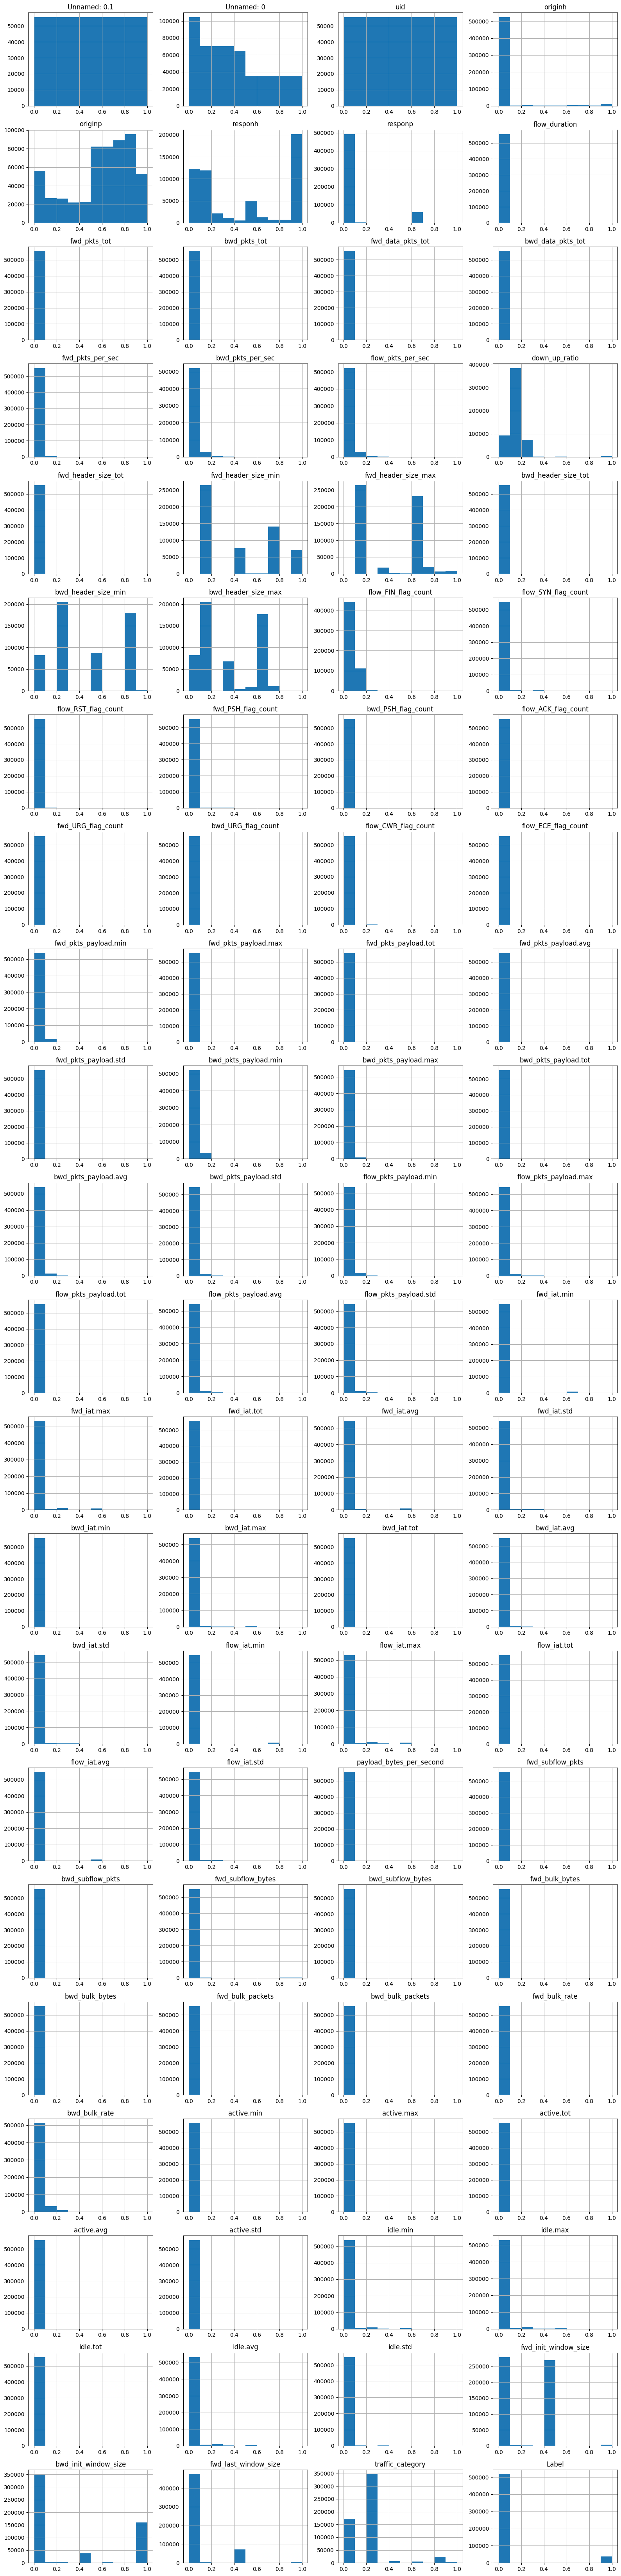

In [28]:
df_preprocessed = Preprocessing(df)

df_preprocessed.hist(figsize=(cols * 4, rows * 3), layout=(rows, cols))
plt.tight_layout()
plt.show()

In [29]:
X = df_preprocessed.drop('Label', axis=1).to_numpy()
y = df_preprocessed['Label'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

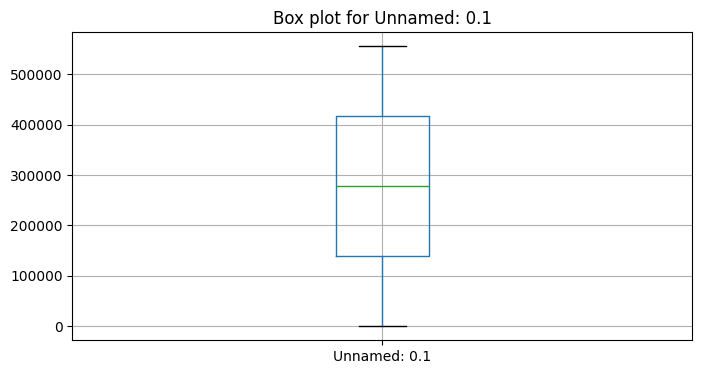

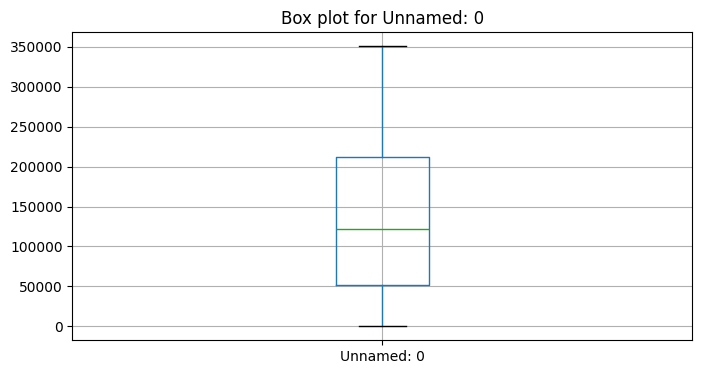

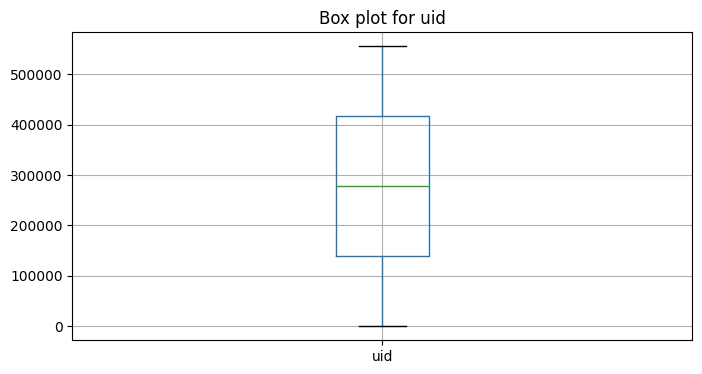

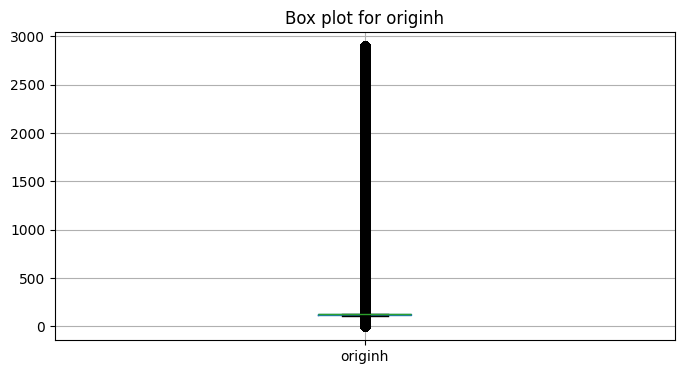

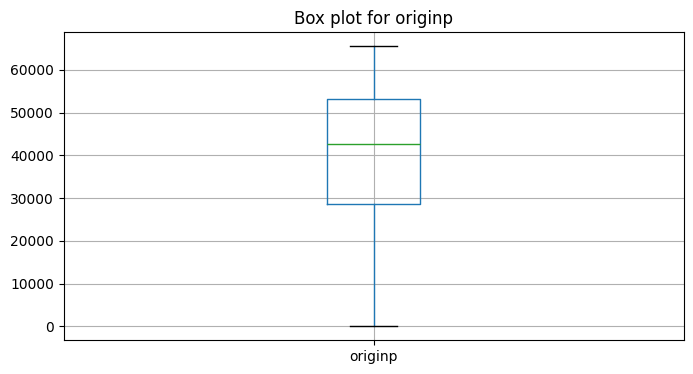

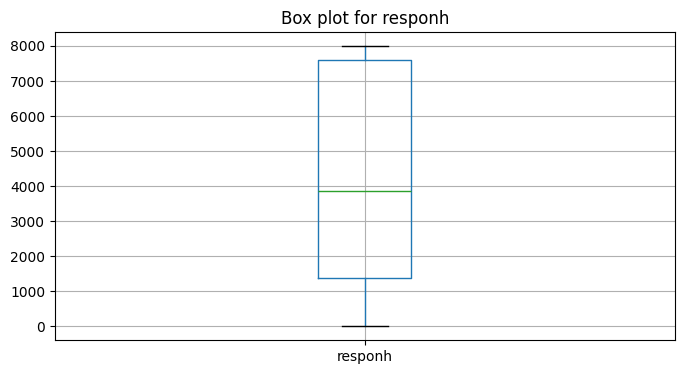

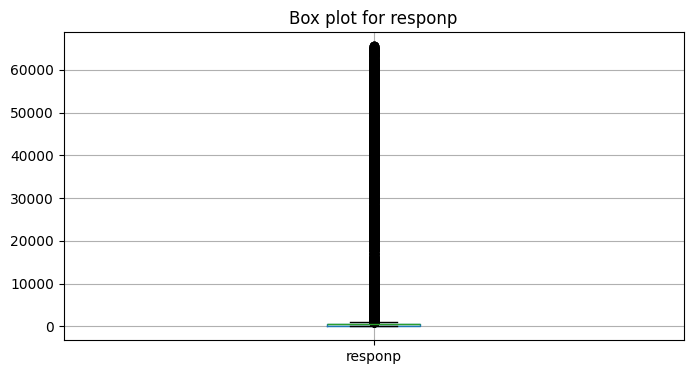

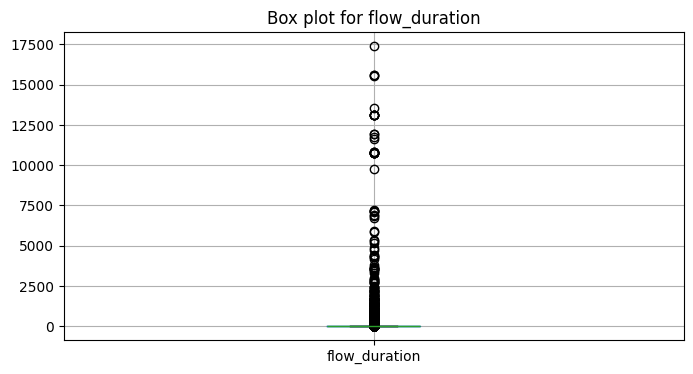

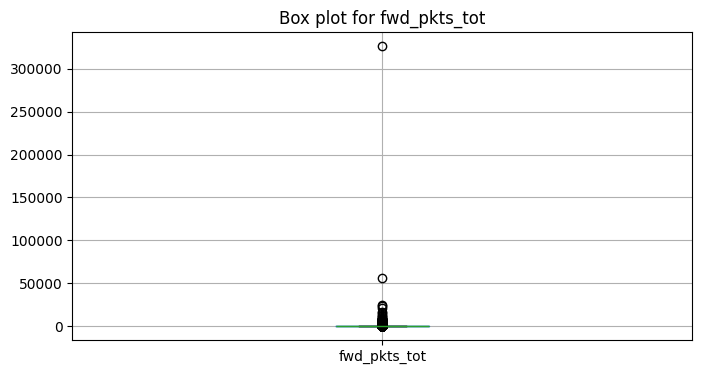

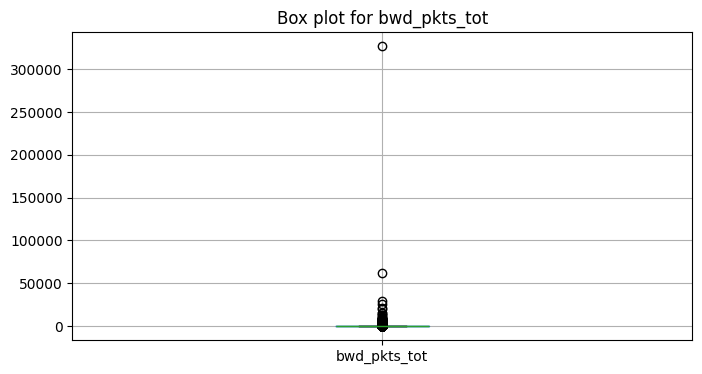

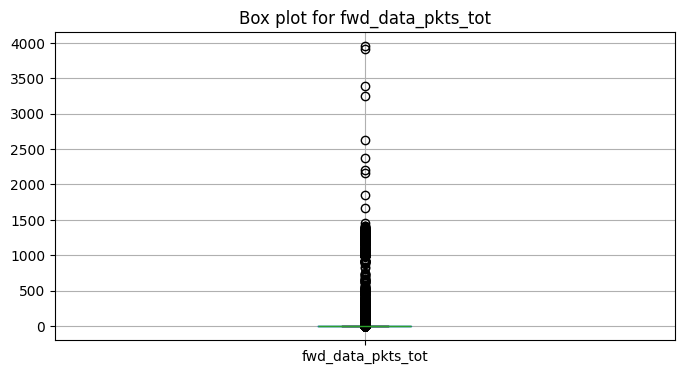

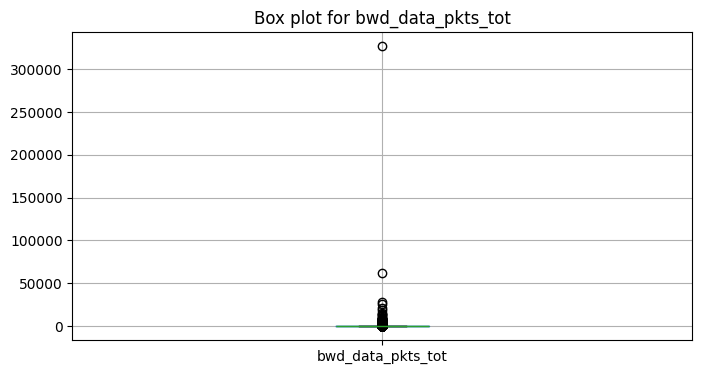

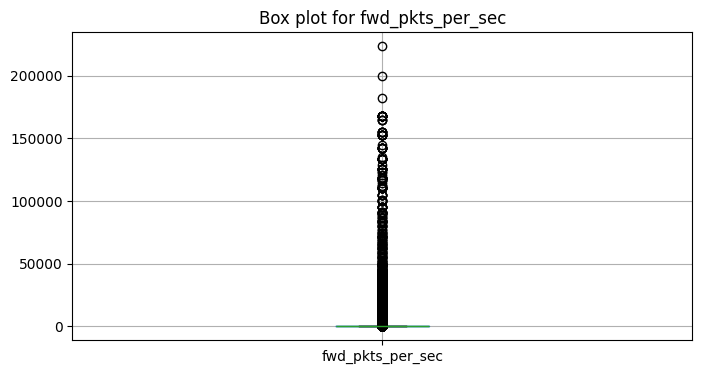

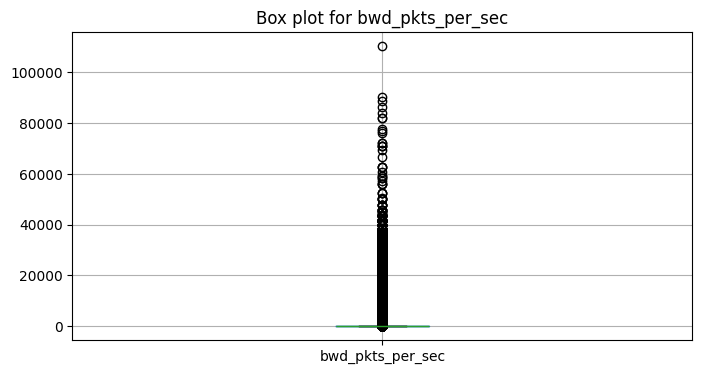

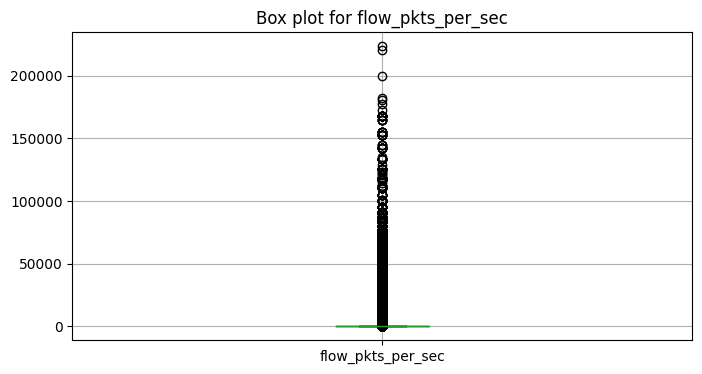

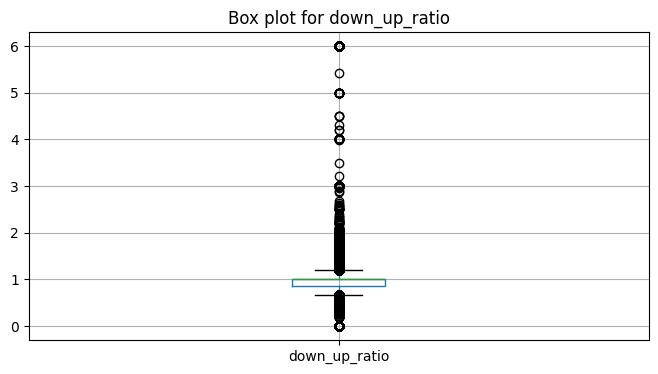

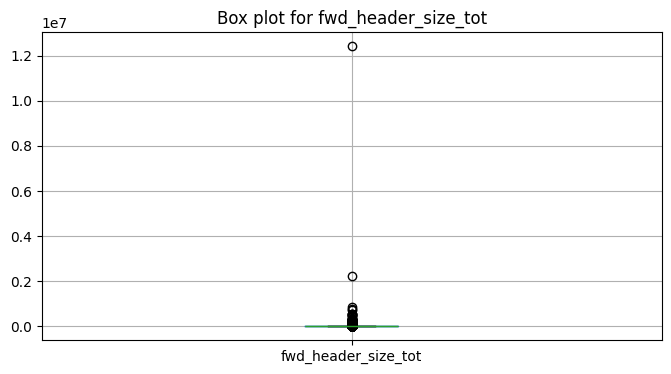

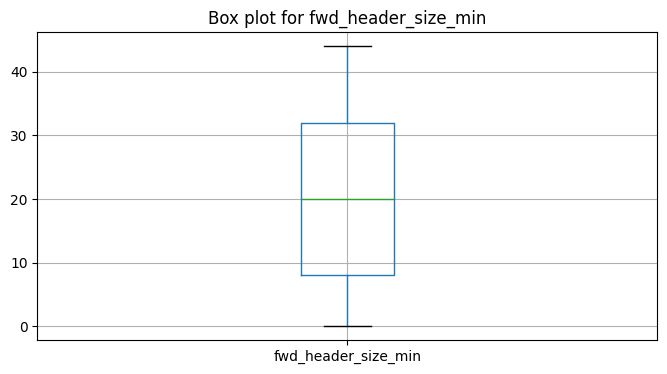

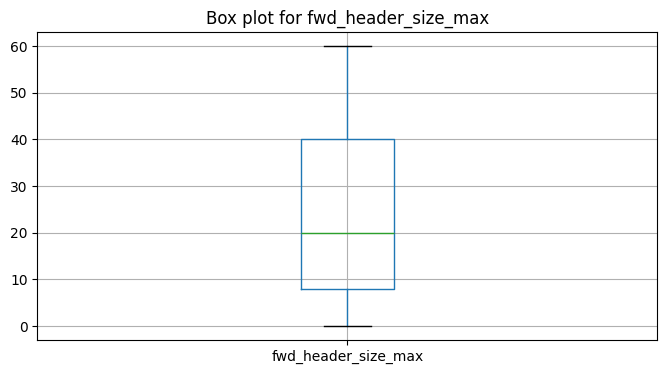

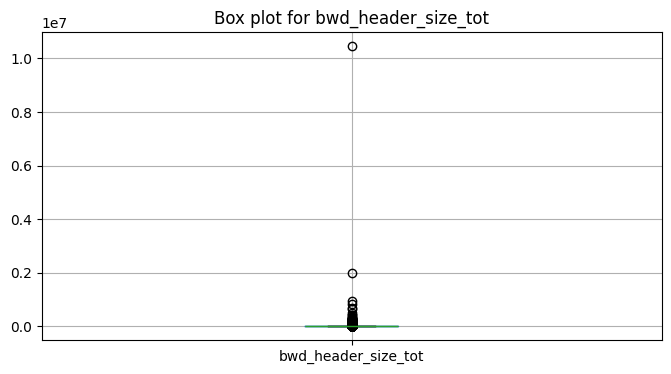

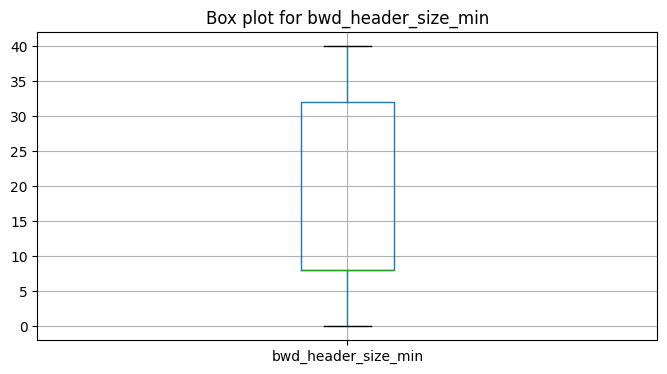

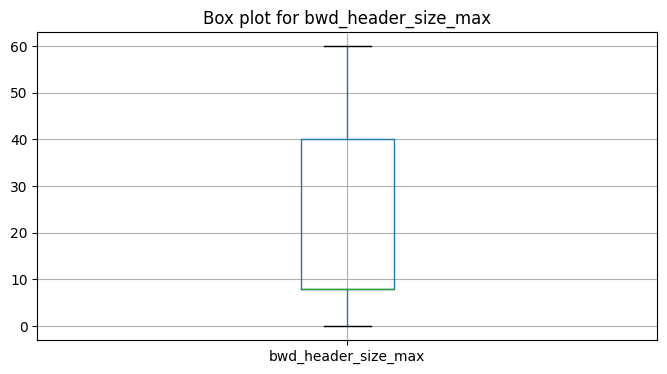

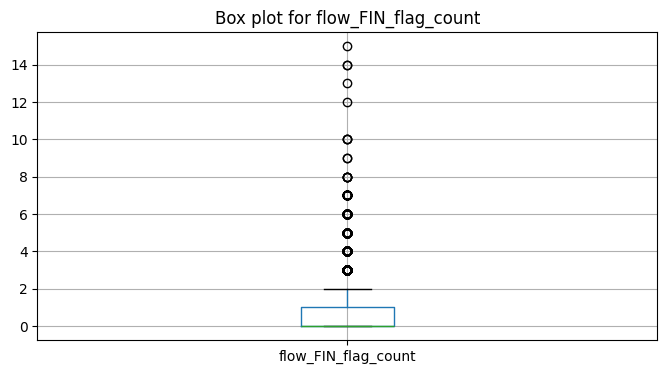

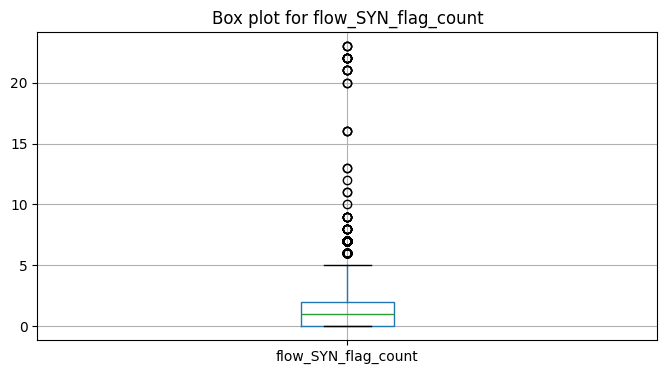

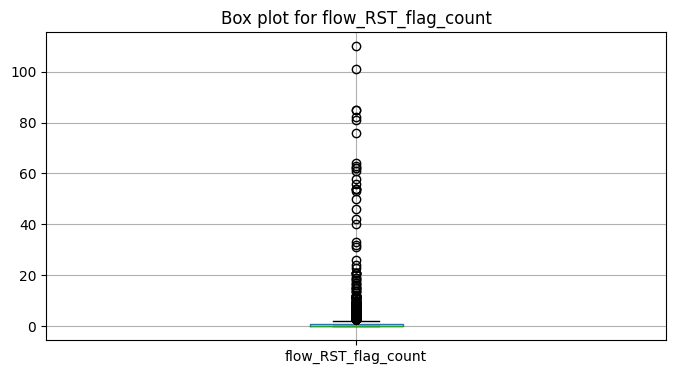

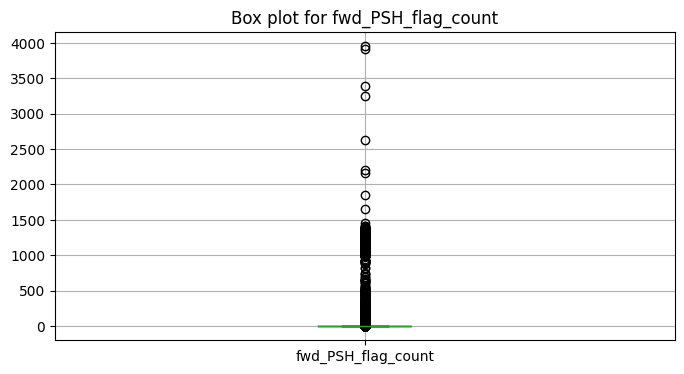

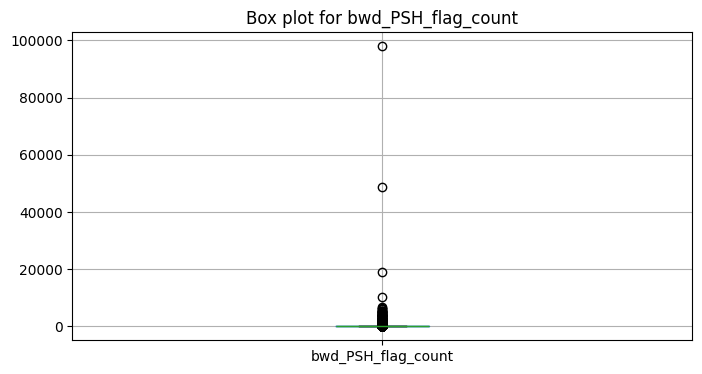

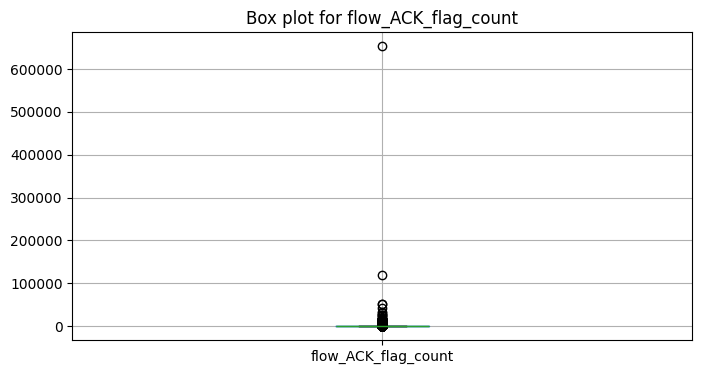

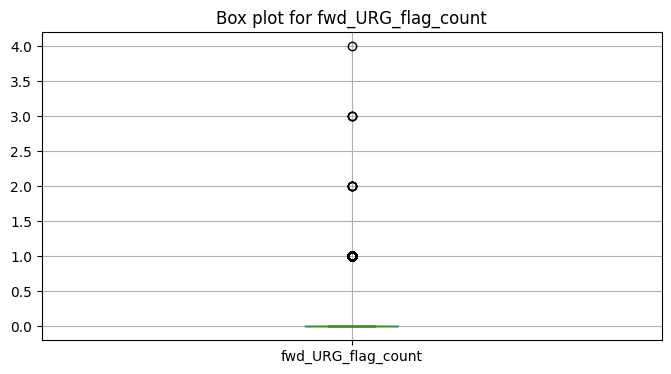

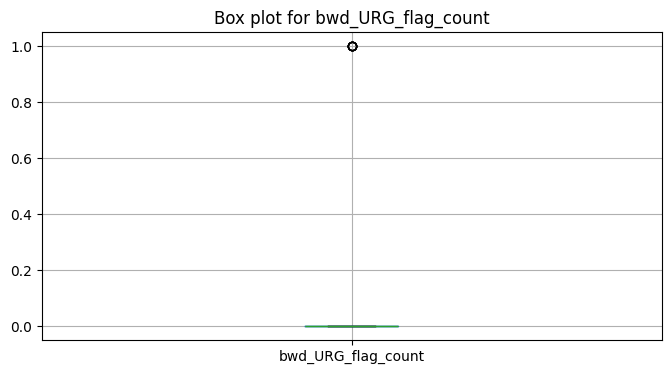

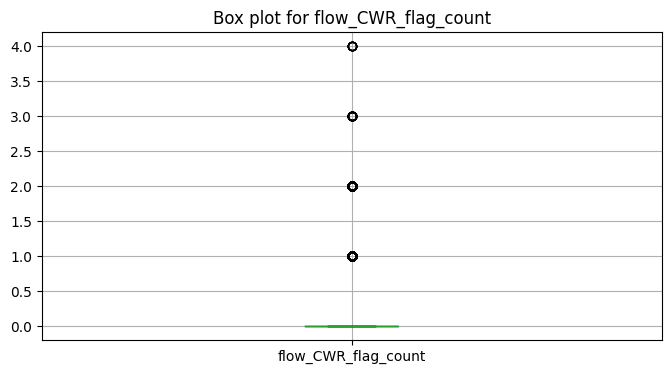

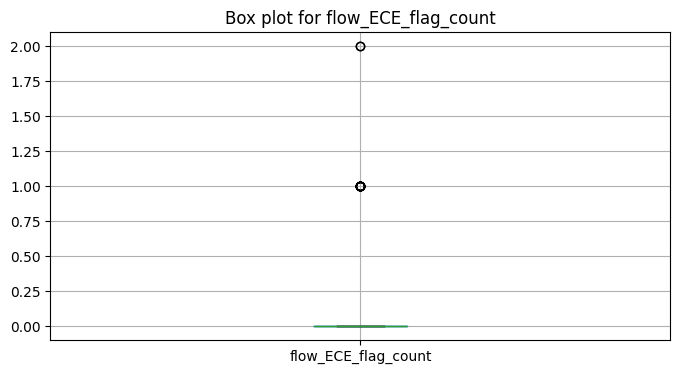

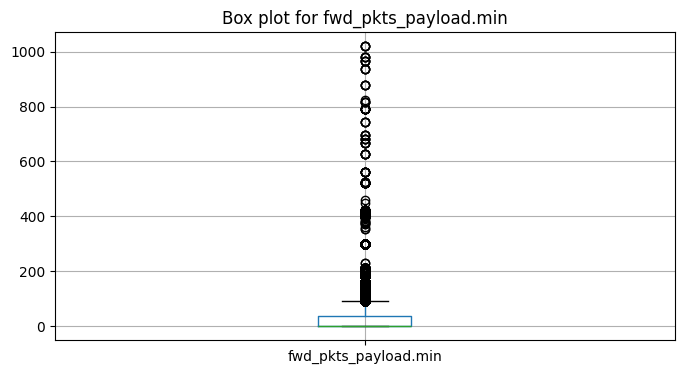

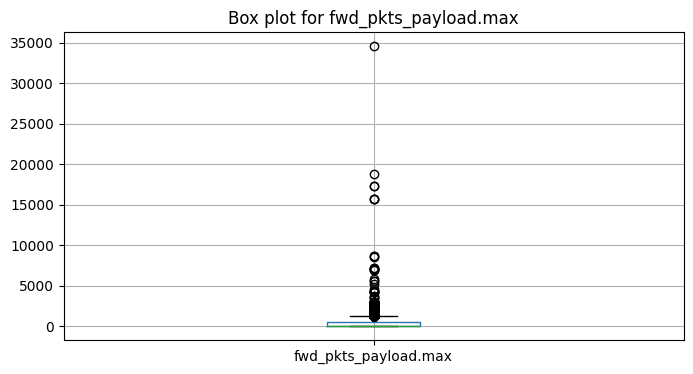

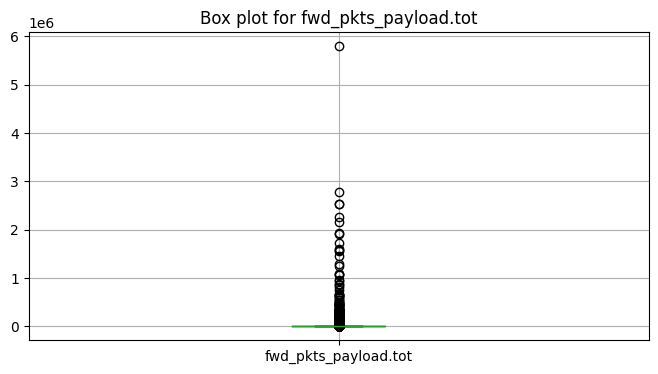

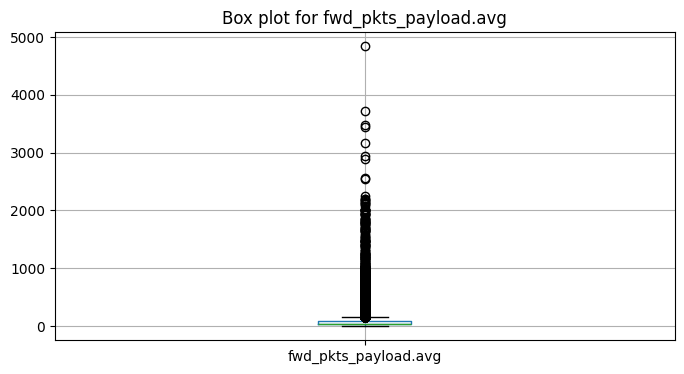

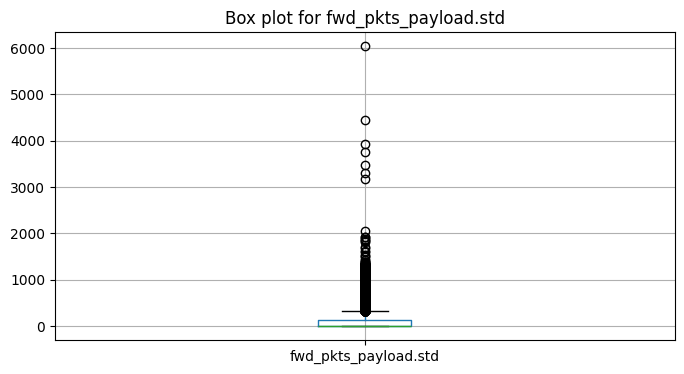

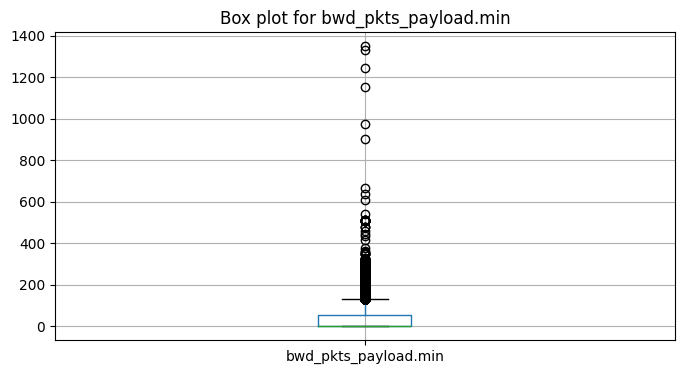

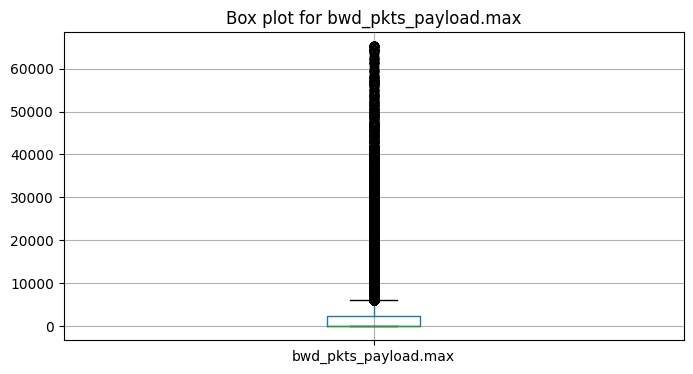

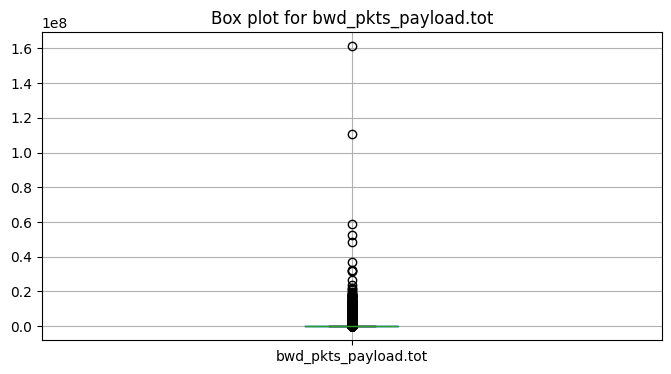

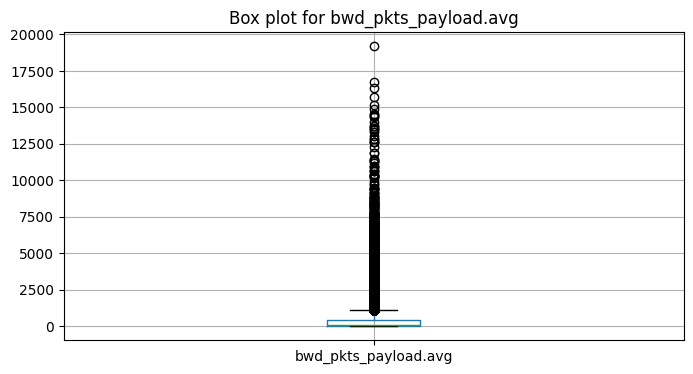

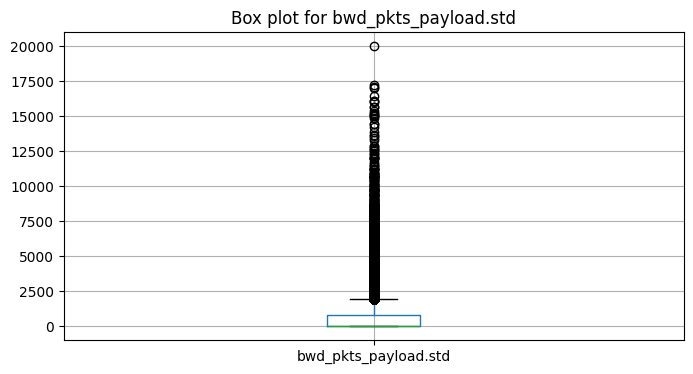

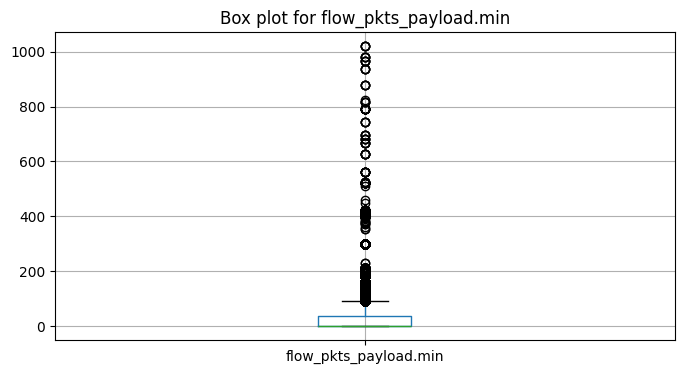

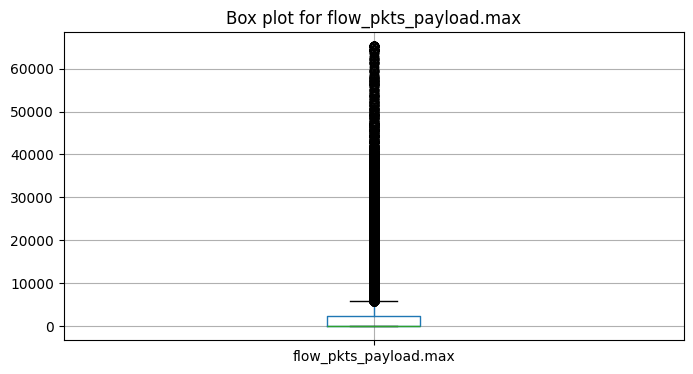

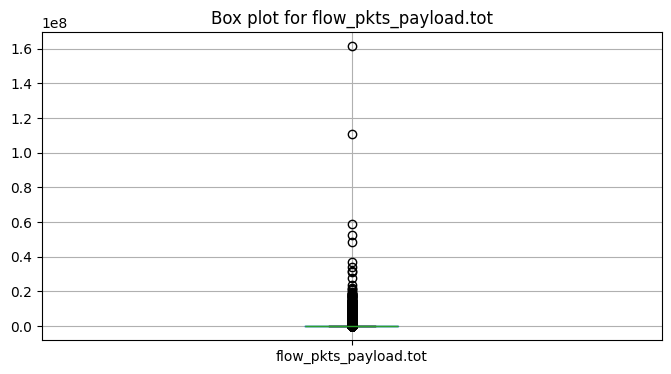

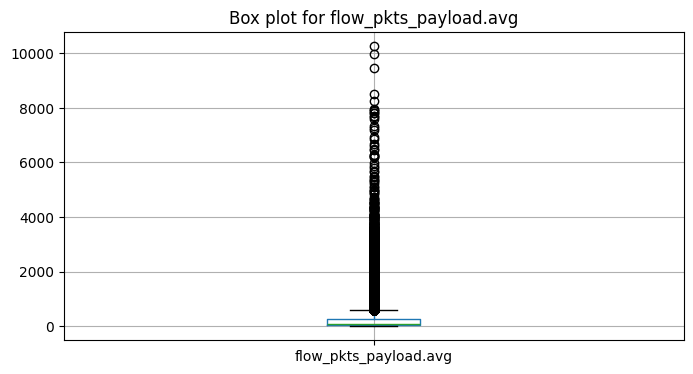

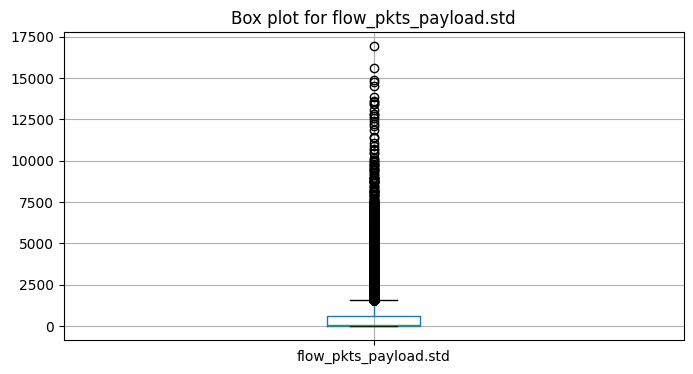

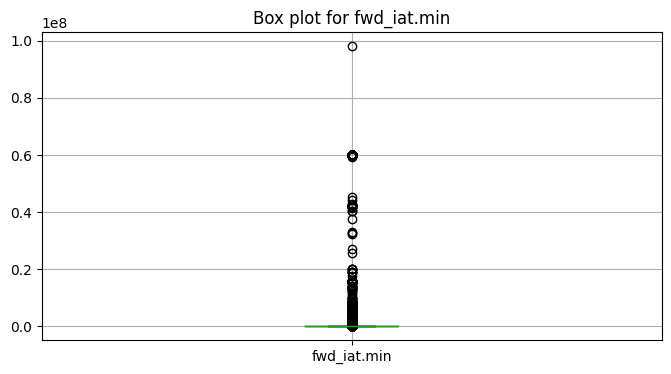

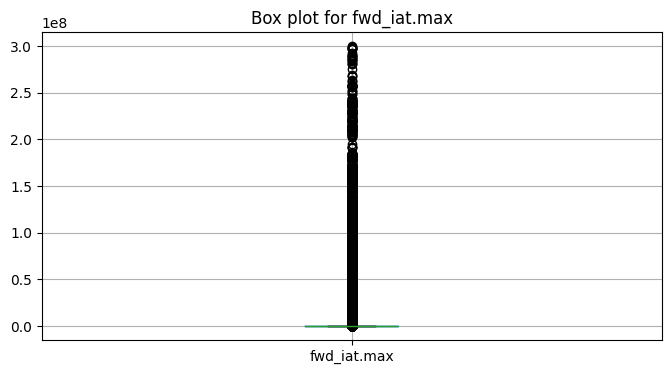

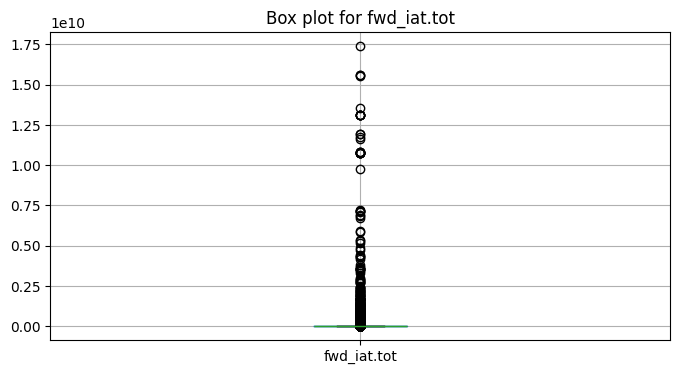

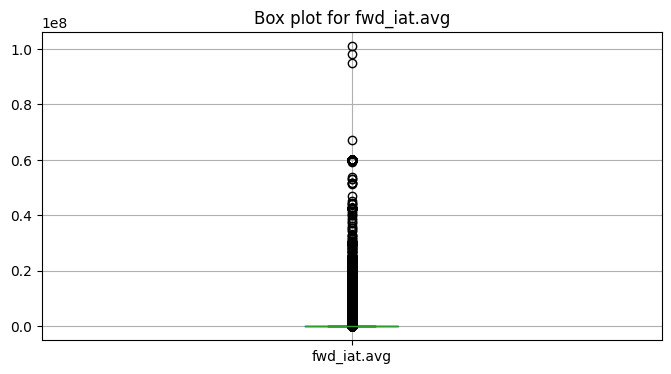

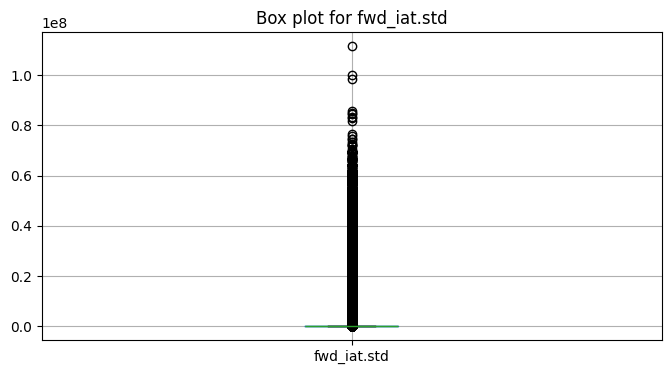

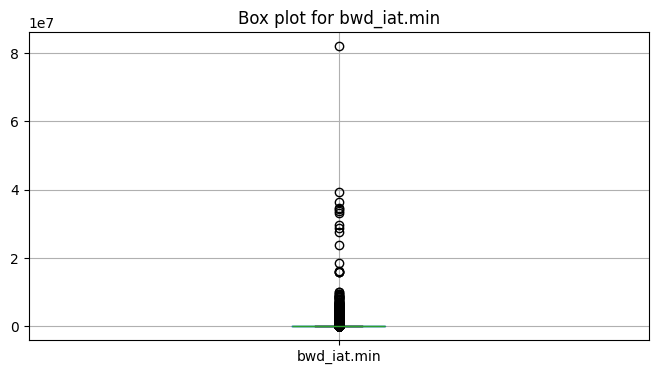

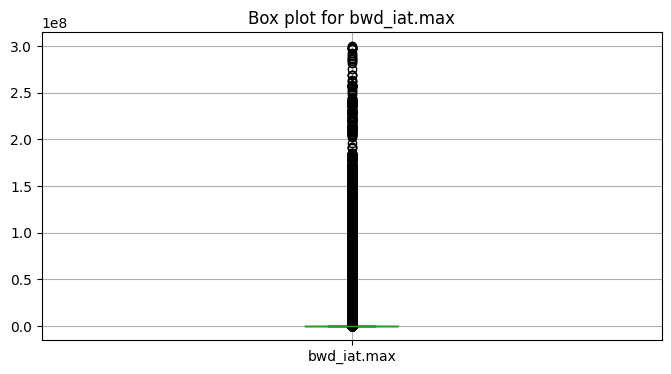

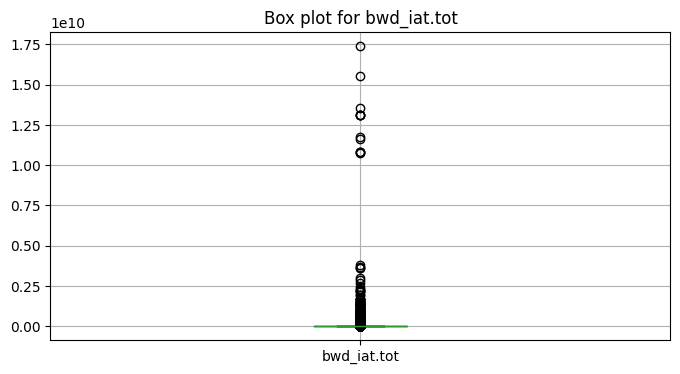

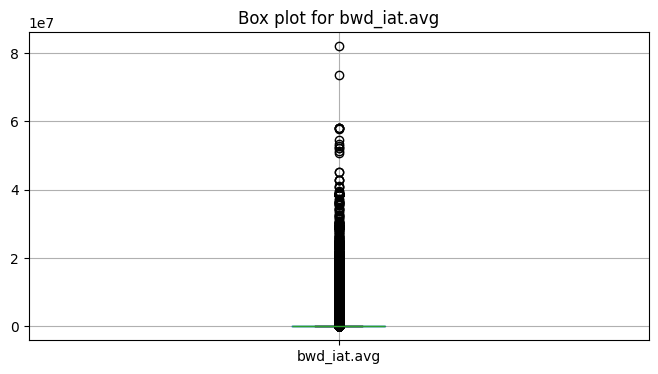

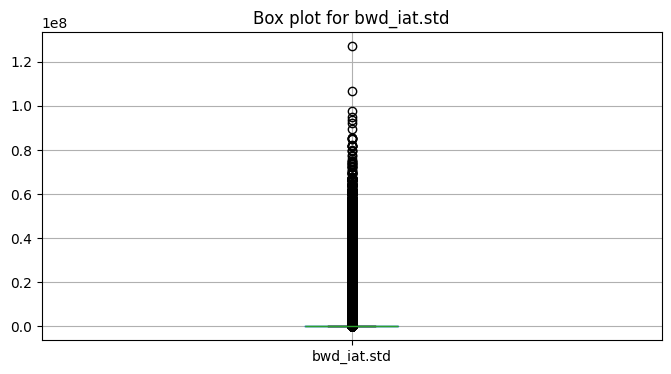

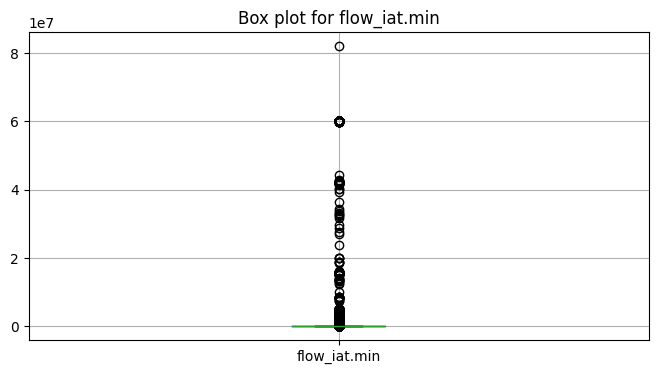

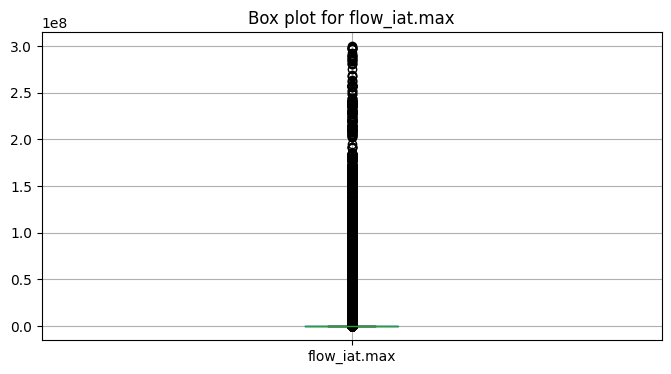

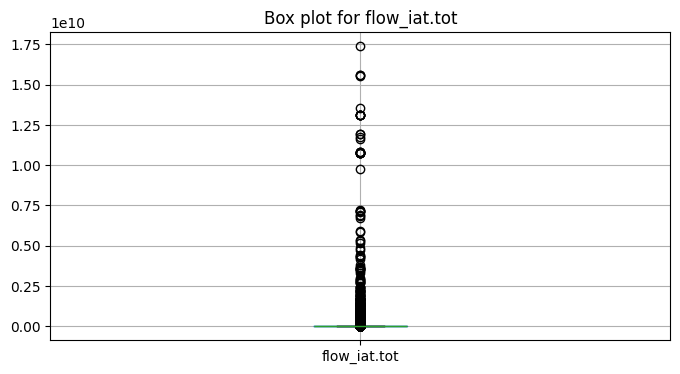

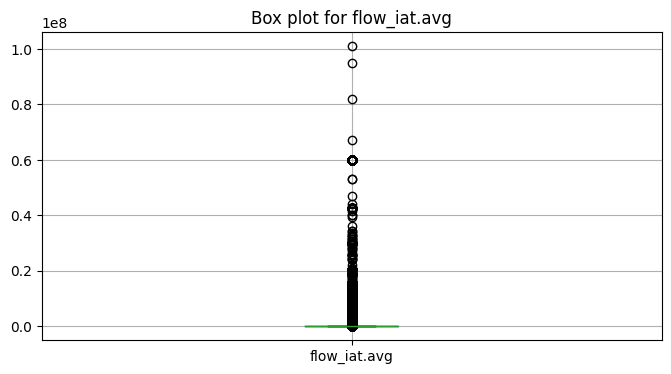

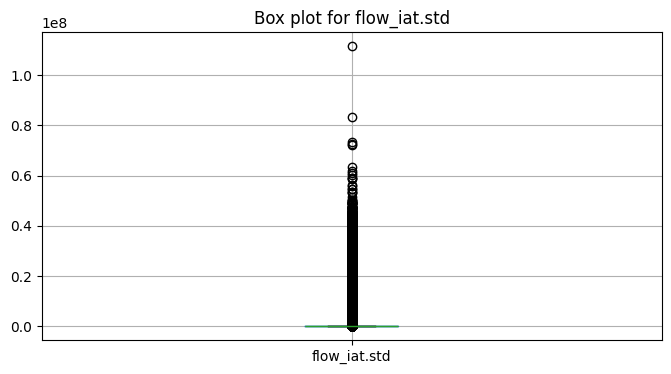

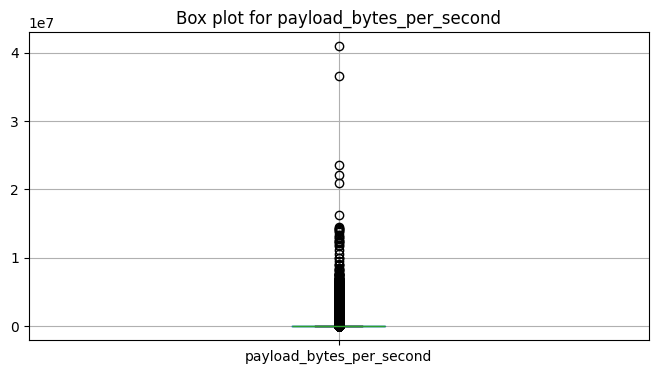

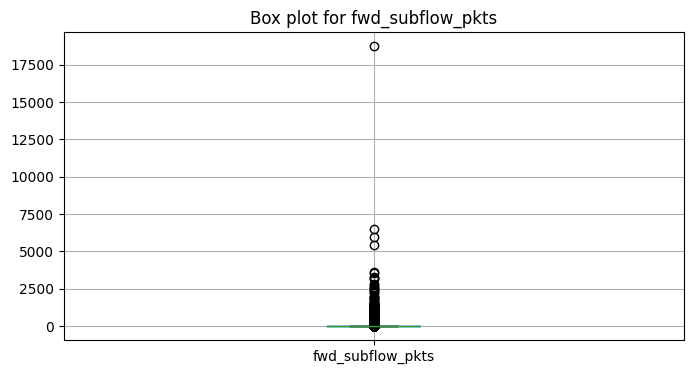

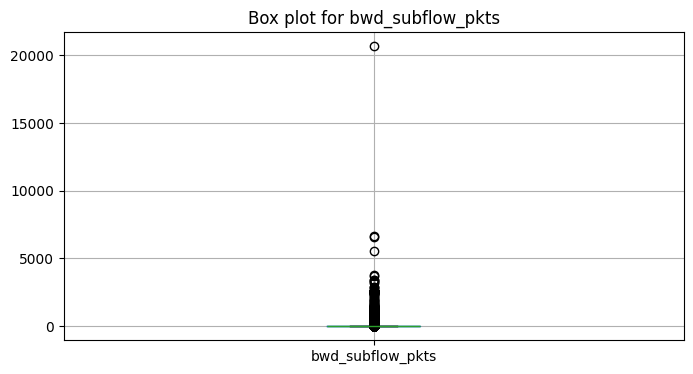

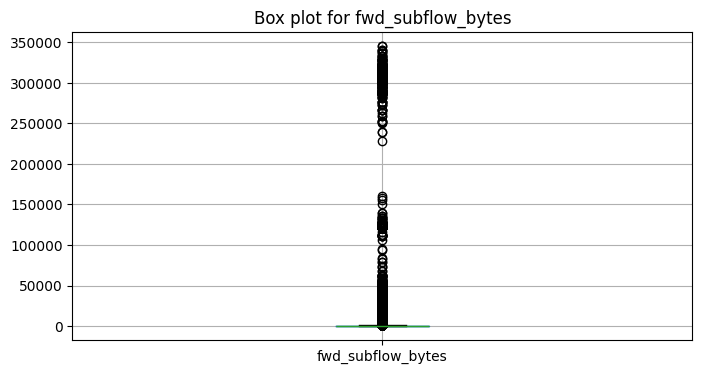

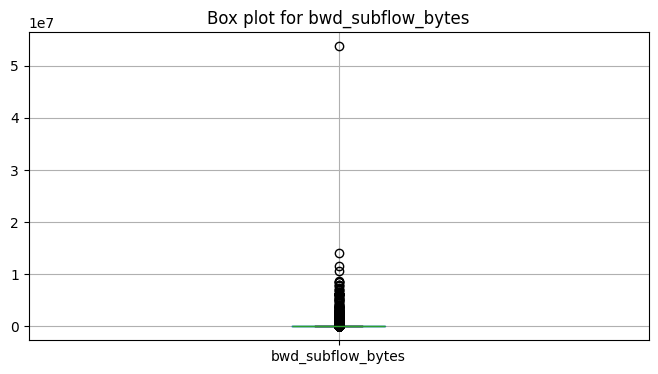

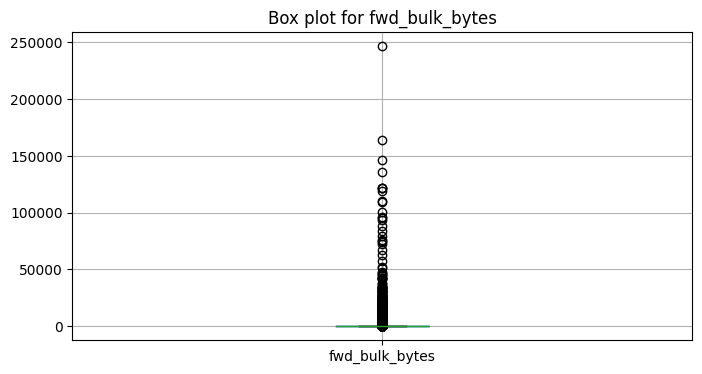

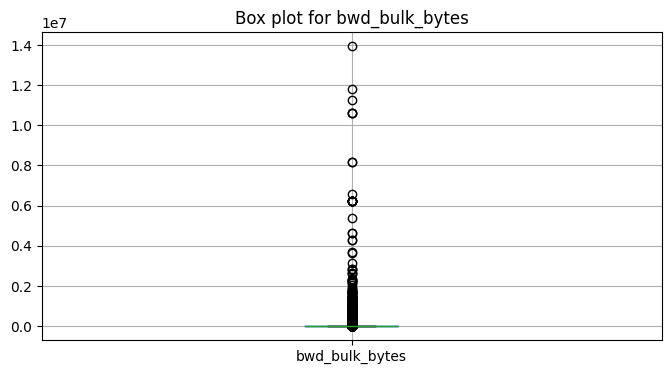

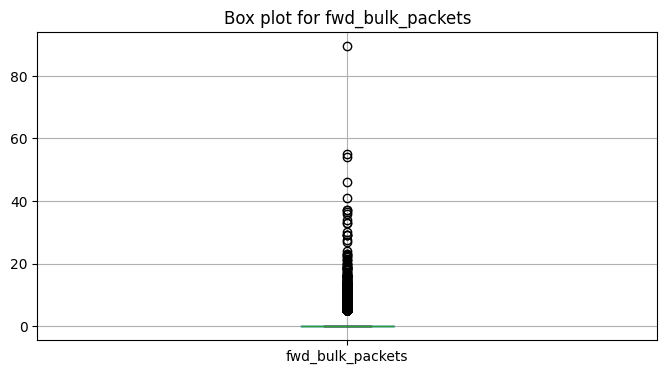

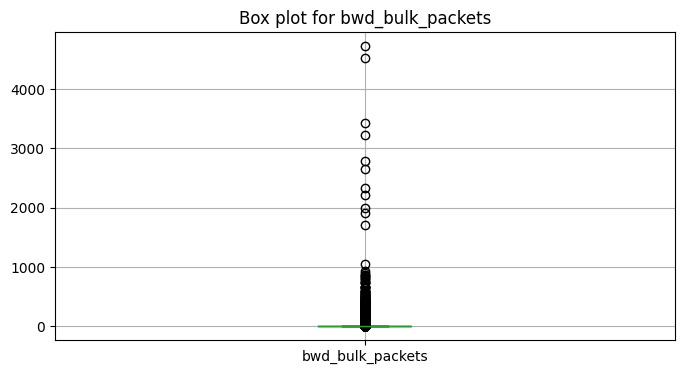

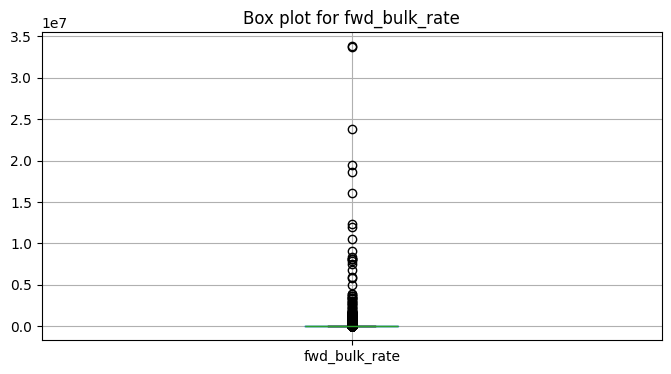

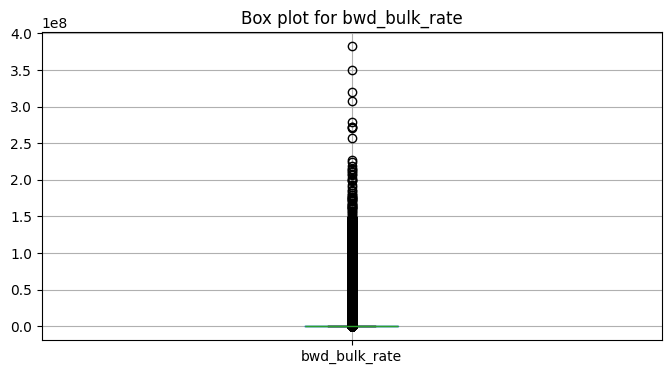

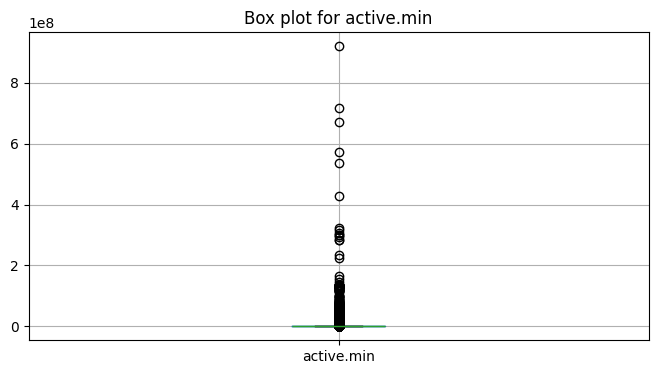

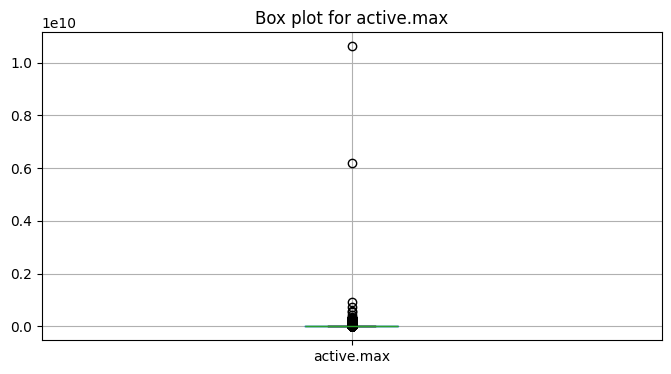

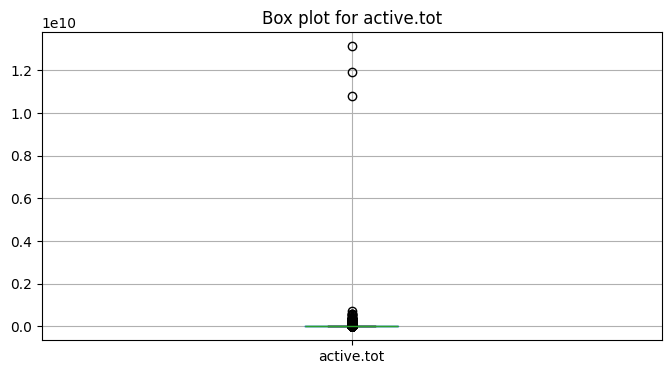

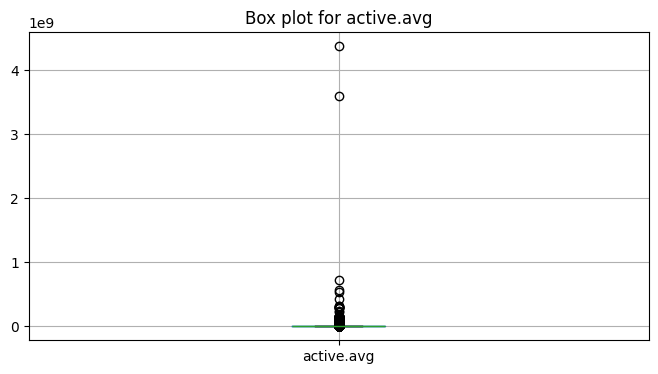

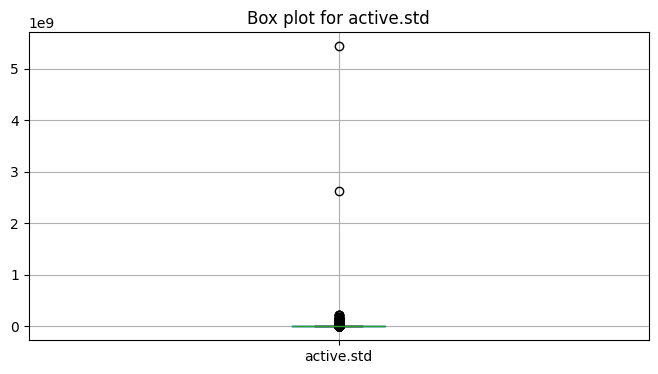

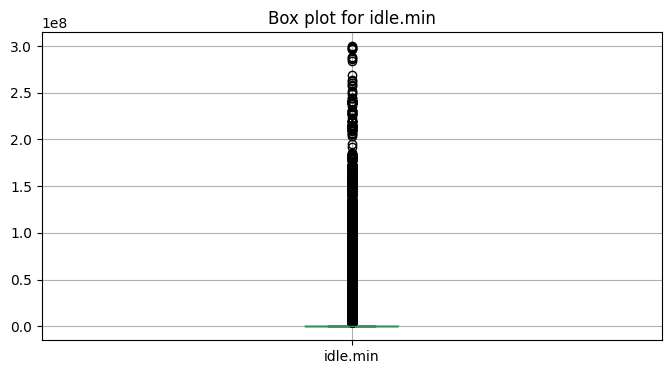

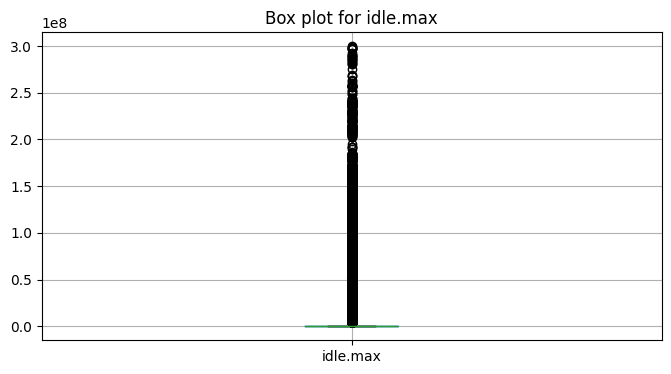

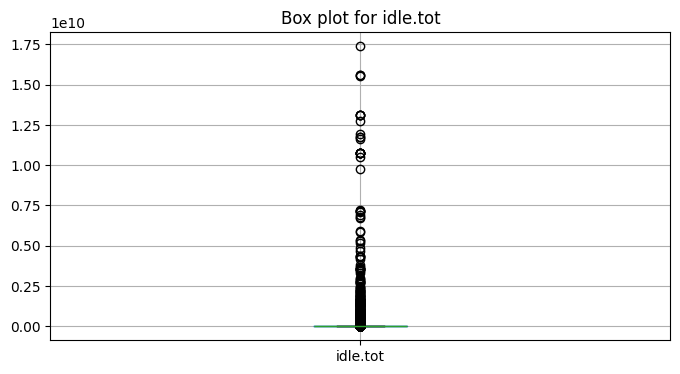

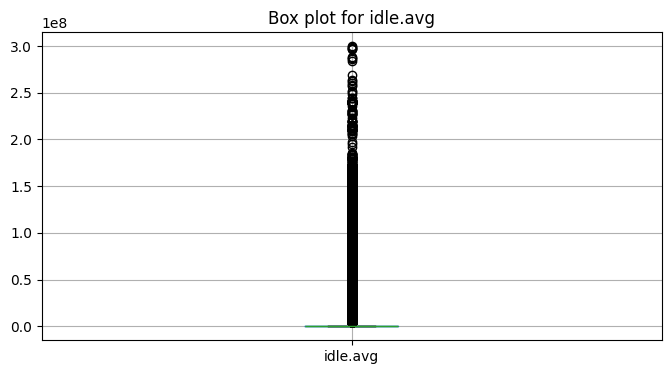

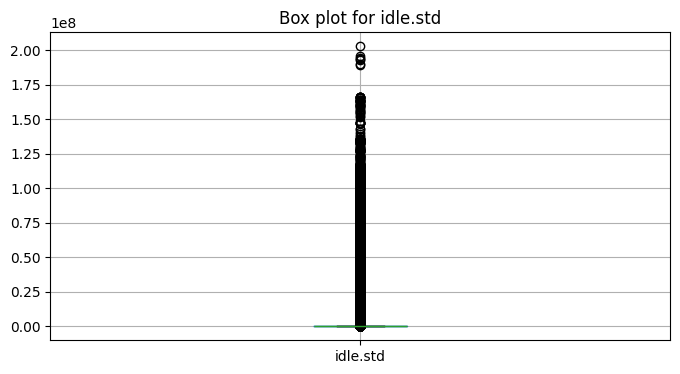

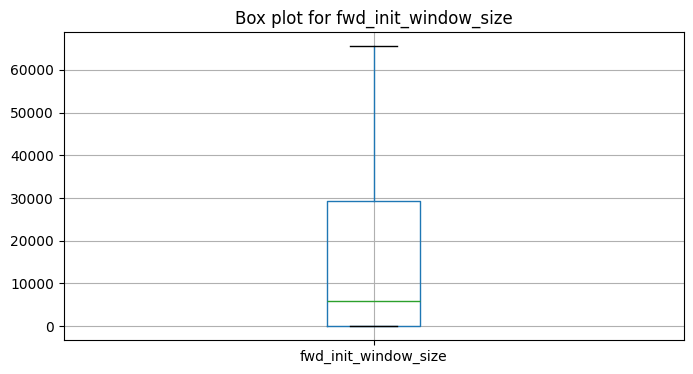

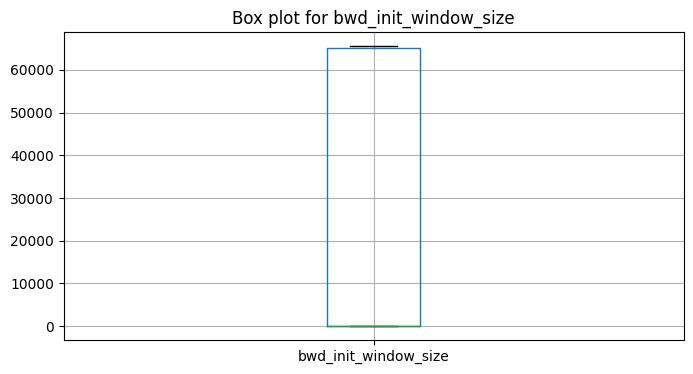

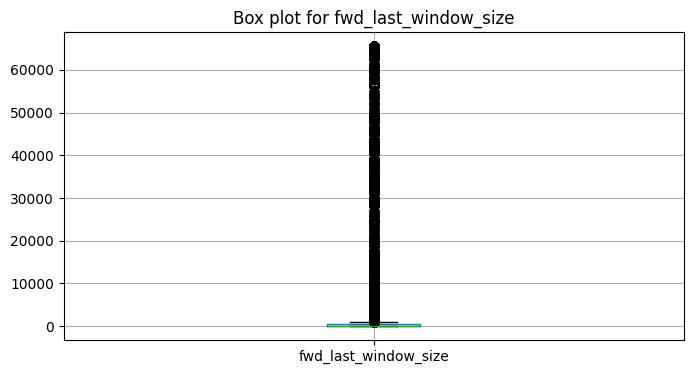

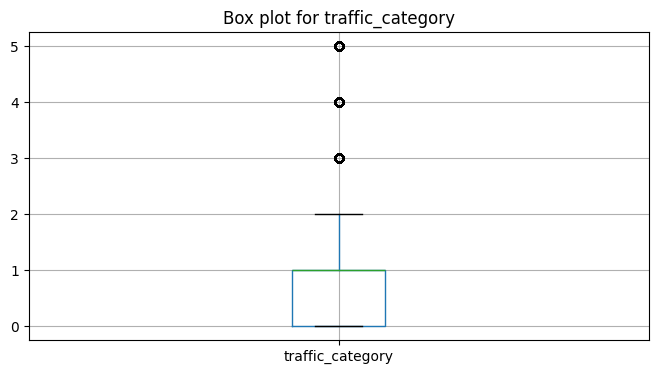

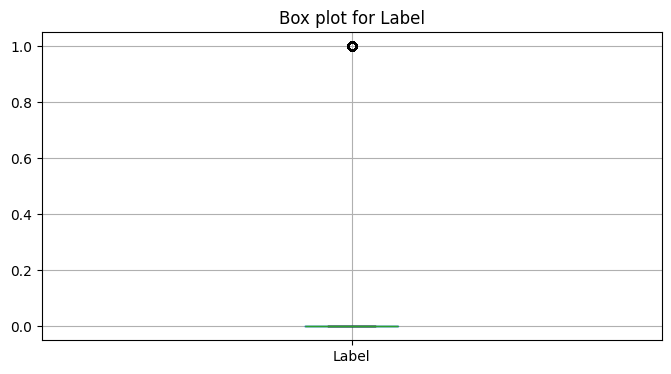

In [32]:
import matplotlib.pyplot as plt

# Create a separate box plot for each feature (column) in the DataFrame
for col in df_preprocessed.columns:
    plt.figure(figsize=(8, 4))  # Optional: Adjust the figure size for each plot
    df.boxplot(column=col)  # Create a box plot for the current column
    plt.title(f'Box plot for {col}')  # Title for each plot
    plt.show()


# Model

## TabNet

### Model

In [ ]:
class TabNet(nn.module):
    def __init__(self, num_feature, num_class, init_neuron):
        super(TabNet, self).__init__()
        
        self.layer1 = nn.Linear(num_feature, init_neuron)
        self.layer2 = nn.Linear(init_neuron, init_neuron/2)
        self.layer3 = nn.Linear(init_neuron/2, init_neuron/4)
        self.layer4 = nn.Linear(init_neuron/4, init_neuron/8)
        self.layer_out = nn.Linear(init_neuron/8, num_class)
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(init_neuron)
        self.batchnorm2 = nn.BatchNorm1d(init_neuron/2)
        self.batchnorm3 = nn.BatchNorm1d(init_neuron/4)
        self.batchnorm4 = nn.BatchNorm1d(init_neuron/8)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer4(x)
        x = self.batchnorm4(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  

### Training

In [ ]:
model = TabNet(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
model.to(device)criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

c:\Users\hadik\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


KeyboardInterrupt: 

### Testing

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


## GANs

### Model

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Select numerical features and normalize
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
data = scaler.fit_transform(df[numerical_cols])

# Hyperparameters
input_dim = 100  # Noise vector size
output_dim = data.shape[1]  # Number of features in the dataset
hidden_dim = 128
batch_size = 256
epochs = 2000
lr = 0.0002

# Generator
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
            nn.Tanh()  # Output normalized between -1 and 1
        )

    def forward(self, x):
        return self.model(x)

# Discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()  # Output between 0 and 1
        )

    def forward(self, x):
        return self.model(x)

# Initialize models
generator = Generator(input_dim, output_dim)
discriminator = Discriminator(output_dim)

# Loss and Optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)


### Training

In [32]:
# Prepare data loader
data_tensor = torch.tensor(data, dtype=torch.float32)
dataloader = torch.utils.data.DataLoader(data_tensor, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(epochs):
    for real_data in dataloader:
        # Train Discriminator
        optimizer_D.zero_grad()
        real_labels = torch.ones(real_data.size(0), 1)  # Label for real data: 1
        fake_labels = torch.zeros(real_data.size(0), 1)  # Label for fake data: 0

        # Real data loss
        outputs = discriminator(real_data)
        d_loss_real = criterion(outputs, real_labels)

        # Fake data loss
        noise = torch.randn(real_data.size(0), input_dim)
        fake_data = generator(noise)
        outputs = discriminator(fake_data.detach())
        d_loss_fake = criterion(outputs, fake_labels)

        # Backprop for discriminator
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        fake_data = generator(noise)
        outputs = discriminator(fake_data)
        g_loss = criterion(outputs, real_labels)  # Generator wants discriminator to output 1 for fake data

        # Backprop for generator
        g_loss.backward()
        optimizer_G.step()

    # Print losses occasionally
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}] | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")


Epoch [100/2000] | D Loss: 0.8408 | G Loss: 1.4809
Epoch [200/2000] | D Loss: 0.6648 | G Loss: 1.6466
Epoch [300/2000] | D Loss: 0.4026 | G Loss: 2.3465
Epoch [400/2000] | D Loss: 0.0830 | G Loss: 3.0820
Epoch [500/2000] | D Loss: 0.3411 | G Loss: 2.9332
Epoch [600/2000] | D Loss: 0.0001 | G Loss: 10.7643
Epoch [700/2000] | D Loss: 0.0000 | G Loss: 100.0000
Epoch [800/2000] | D Loss: 0.0000 | G Loss: 100.0000
Epoch [900/2000] | D Loss: 0.0000 | G Loss: 100.0000
Epoch [1000/2000] | D Loss: 0.0000 | G Loss: 100.0000


KeyboardInterrupt: 

### Generate New Data

In [33]:
# Generate new synthetic data
noise = torch.randn(1000, input_dim)  # Generate 1000 samples
synthetic_data = generator(noise).detach().numpy()

# Inverse transform to original scale
synthetic_data_original_scale = scaler.inverse_transform(synthetic_data)

# Convert to DataFrame
synthetic_df = pd.DataFrame(synthetic_data_original_scale, columns=numerical_cols)
print(synthetic_df.head())


   Unnamed: 0.1  Unnamed: 0       uid   originh   originp   responh  responp  \
0      0.120594    0.220636  0.501353  0.187281  0.611248  0.627082  -0.0056   
1      0.120594    0.220636  0.501353  0.187281  0.611248  0.627082  -0.0056   
2      0.120594    0.220636  0.501353  0.187281  0.611248  0.627082  -0.0056   
3      0.120594    0.220636  0.501353  0.187281  0.611248  0.627082  -0.0056   
4      0.120594    0.220636  0.501353  0.187281  0.611248  0.627082  -0.0056   

   flow_duration  fwd_pkts_tot  bwd_pkts_tot  ...  idle.min  idle.max  \
0        0.09016      0.022847     -0.026595  ...  0.009359  -0.02028   
1        0.09016      0.022847     -0.026595  ...  0.009359  -0.02028   
2        0.09016      0.022847     -0.026595  ...  0.009359  -0.02028   
3        0.09016      0.022847     -0.026595  ...  0.009359  -0.02028   
4        0.09016      0.022847     -0.026595  ...  0.009359  -0.02028   

   idle.tot  idle.avg  idle.std  fwd_init_window_size  bwd_init_window_size  \
0

# Testing With New Dataset

In [ ]:
def make_prediction(df):
    df = LabelEncoding(df)
    df = Standarization(df)
    df = Normalization(df)
    
    X = df.drop('Label', axis=1).to_numpy()
    y = df['Label'].to_numpy()

    y_pred = model.predict(X)

    accuracy = accuracy_score(y, y_pred)
    print(f'Accuracy: {accuracy}')
    

In [ ]:
make_prediction(synthetic_df)